In [1]:
# Importing libraries

import requests # Allows us to send HTTP requests to web pages
from bs4 import BeautifulSoup  # A library for parsing HTML and extracting data.
import yfinance as yf  # A library to download stock data from Yahoo Finance.
import pandas as pd # for data manipulation
from datetime import datetime  # handles date and time


In [2]:
# Function to scrape most active stocks from Yahoo Finance

def get_most_active_stocks():
    url = "https://finance.yahoo.com/most-active"
    response = requests.get(url)  # sends HTTP get request to the url
    soup = BeautifulSoup(response.text, 'html.parser') # Parses the HTML content of the page using BeautifulSoup
    
    symbols = [] # an empty list to store stock symbols
    for row in soup.find_all('tr', attrs={'class': 'simpTblRow'}): # loops through each row in the table of most active stocks
        symbol = row.find('td', attrs={'aria-label': 'Symbol'}).text # extracts the stock symbol from each row.
        symbols.append(symbol)  # extracts the stock symbol from each row.
        
    return symbols # returns the list of stock symbols


In [3]:
# Function to get real-time stock data

def get_stock_data(symbols): # retrieves real-time stock data for the given list of symbols
    stock_data = []  # an empty list to store the stock data

    for symbol in symbols:  # Loops through each stock symbol
        stock = yf.Ticker(symbol) #  creates a Ticker object for the symbol using yfinance
        hist = stock.history(period="1d", interval="1m") # retrieves the historical stock data for one day with one-minute interval
        if not hist.empty:   # checks if the historical data is not empty
            for timestamp, row in hist.iterrows(): # Loops through each row of the historical data.
                stock_data.append({ # appends a dictionary of stock data to the list.
                    'Symbol': symbol,
                    'Date': timestamp.strftime('%Y-%m-%d %H:%M:%S'),
                    'Open': row['Open'],
                    'High': row['High'],
                    'Low': row['Low'],
                    'Close': row['Close'],
                    'Volume': row['Volume']
                })
                
    return stock_data

In [4]:
# Main function to fetch and save data for just one day

def main():  
    symbols = get_most_active_stocks()  # Calls the function to get the most active stock symbols.
    stock_data = get_stock_data(symbols)  # Calls the function to get the real-time stock data for the symbols
    df = pd.DataFrame(stock_data)   # Converts the list of stock data to a pandas DataFrame
    
    if not df.empty:   #Checks if the DataFrame is not empty
        df.to_csv("most_active_stocks_one_day.csv", index=False)  # Saves the DataFrame to a CSV file
        print(df)   #  Prints the DataFrame to the console.

if __name__ == "__main__":  # Ensures the main function runs only when the script is executed directly.
    main()


     Symbol                 Date       Open       High        Low      Close  \
0       GME  2024-05-17 09:30:00  21.860001  22.299999  21.850000  22.100700   
1       GME  2024-05-17 09:31:00  22.110001  22.209999  21.700001  21.709000   
2       GME  2024-05-17 09:32:00  21.745001  21.754999  21.730000  21.751400   
3       GME  2024-05-17 09:33:00  20.860300  20.869900  20.629999  20.660000   
4       GME  2024-05-17 09:34:00  20.700001  21.170000  20.670000  21.139999   
...     ...                  ...        ...        ...        ...        ...   
9715      T  2024-05-17 15:55:00  17.395000  17.400000  17.379999  17.391001   
9716      T  2024-05-17 15:56:00  17.389999  17.389999  17.379999  17.385000   
9717      T  2024-05-17 15:57:00  17.385000  17.389999  17.379999  17.389999   
9718      T  2024-05-17 15:58:00  17.385000  17.389999  17.379999  17.385000   
9719      T  2024-05-17 15:59:00  17.389999  17.405001  17.379999  17.395000   

          Volume  
0     20573479.0  
1

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore") #to suppress8 any warnings.

# Load the dataset
df = pd.read_csv('most_active_stocks_one_day1.csv')

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set the Date column as the index
df.set_index('Date', inplace=True)


In [2]:
# Display the first 5 rows of the dataset
df.head()

,Symbol,Open,High,Low,Close,Volume
Date,,,,,,
2024-05-17 09:30:00,GME,21.860001,22.299999,21.850000,22.100700,20573479.0
2024-05-17 09:31:00,GME,22.110001,22.209999,21.700001,21.709000,655663.0
2024-05-17 09:32:00,GME,21.745001,21.754999,21.730000,21.751400,1240.0
2024-05-17 09:33:00,GME,20.860300,20.869900,20.629999,20.660000,1884318.0
2024-05-17 09:34:00,GME,20.700001,21.170000,20.670000,21.139999,699738.0


In [3]:
# Display the last 5 rows of the dataset
df.tail()  

,Symbol,Open,High,Low,Close,Volume
Date,,,,,,
2024-05-17 15:55:00,T,17.395000,17.400000,17.379999,17.391001,317659.0
2024-05-17 15:56:00,T,17.389999,17.389999,17.379999,17.385000,146572.0
2024-05-17 15:57:00,T,17.385000,17.389999,17.379999,17.389999,104386.0
2024-05-17 15:58:00,T,17.385000,17.389999,17.379999,17.385000,211228.0
2024-05-17 15:59:00,T,17.389999,17.405001,17.379999,17.395000,638550.0


### Data Cleaning

In [3]:
# Display summary information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9720 entries, 2024-05-17 09:30:00 to 2024-05-17 15:59:00
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Symbol  9720 non-null   object 
 1   Open    9720 non-null   float64
 2   High    9720 non-null   float64
 3   Low     9720 non-null   float64
 4   Close   9720 non-null   float64
 5   Volume  9720 non-null   float64
dtypes: float64(5), object(1)
memory usage: 531.6+ KB


In [5]:
# check for uniqueness of the symbol column
df.Symbol.unique()

array(['GME', 'TSLA', 'AMD', 'NIO', 'HOOD', 'MARA', 'INTC', 'AAPL',
       'SOFI', 'NVDA', 'DNN', 'BABA', 'PLUG', 'AMZN', 'CLSK', 'KVUE',
       'PLTR', 'WMT', 'LCID', 'NU', 'GRAB', 'PBR', 'VALE', 'PFE', 'T'],
      dtype=object)

In [6]:
# checking for null values
print(df.isna().sum())  

Symbol    0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


In [7]:
# Check for the statistical summary
df.describe()

,Open,High,Low,Close,Volume
count,9720.000000,9720.000000,9720.000000,9720.000000,9.720000e+03
mean,82.563911,82.612851,82.513698,82.562236,9.446786e+04
std,183.793380,183.889573,183.687133,183.784480,2.535980e+05
min,2.095000,2.104200,2.090000,2.095000,1.000000e+02
25%,11.650000,11.656875,11.640000,11.650000,2.639725e+04
50%,20.100850,20.144250,20.059999,20.099250,5.338800e+04
75%,64.666473,64.690002,64.644997,64.662827,1.070675e+05
max,946.929993,947.400024,945.500000,947.013123,2.057348e+07


### Exploratory Data Analysis 

### Calculate Daily Return of Nvidia, Tesla and Apple Stocks

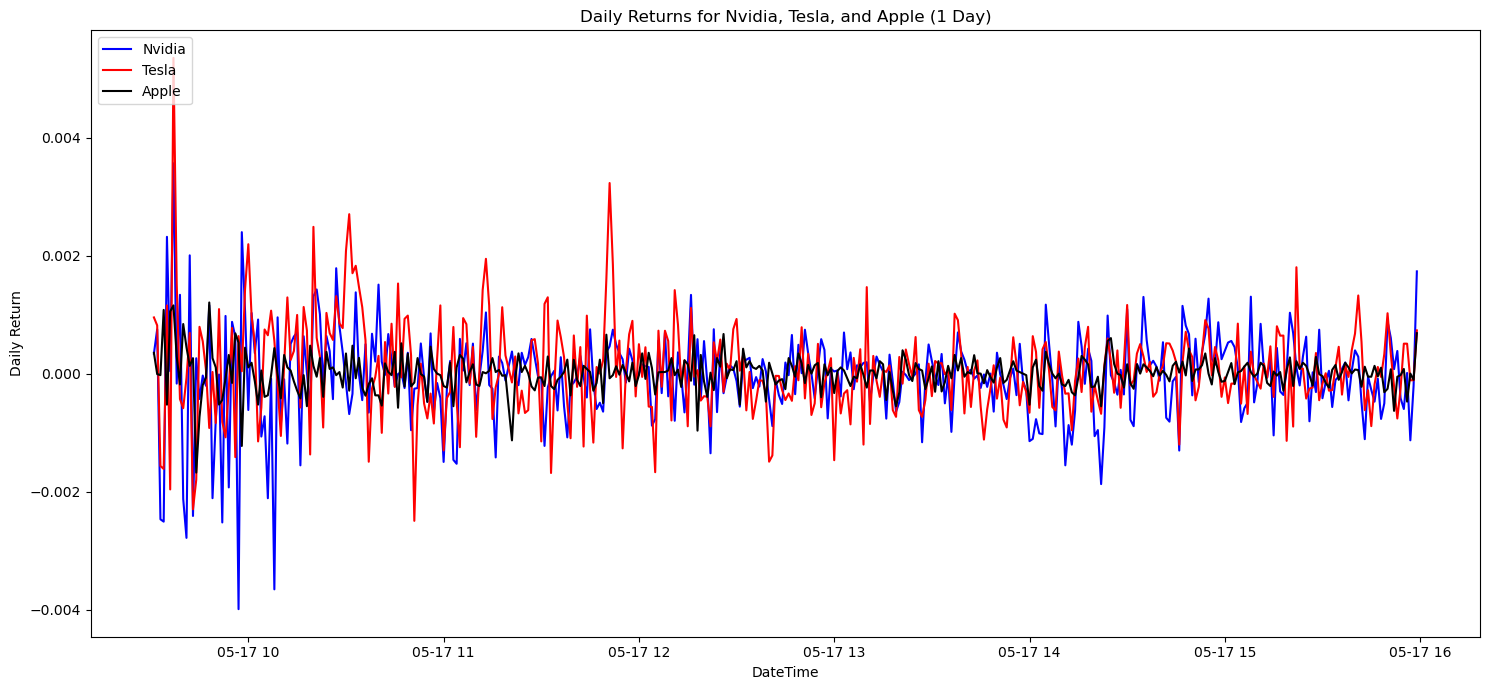

In [11]:
# Filter data for each stock symbol
nvda_df = df.loc[df["Symbol"] == "NVDA"]
tsla_df = df.loc[df["Symbol"] == "TSLA"]
aapl_df = df.loc[df["Symbol"] == "AAPL"]

# Calculate daily returns
nvda_df['Daily_Return'] = nvda_df['Close'].pct_change()
tsla_df['Daily_Return'] = tsla_df['Close'].pct_change()
aapl_df['Daily_Return'] = aapl_df['Close'].pct_change()

# Create the plot
plt.figure(figsize=(15, 7))

plt.plot(nvda_df.index, nvda_df['Daily_Return'], label='Nvidia', color='blue')
plt.plot(tsla_df.index, tsla_df['Daily_Return'], label='Tesla', color='red')
plt.plot(aapl_df.index, aapl_df['Daily_Return'], label='Apple', color='black')

# Add title and labels
plt.title('Daily Returns for Nvidia, Tesla, and Apple (1 Day)')
plt.xlabel('DateTime')
plt.ylabel('Daily Return')
plt.legend(loc='upper left') 

# Show the plot
plt.tight_layout()
plt.show()

### Calculate Cumulative Return of Nvidia, Tesla and Apple Stocks

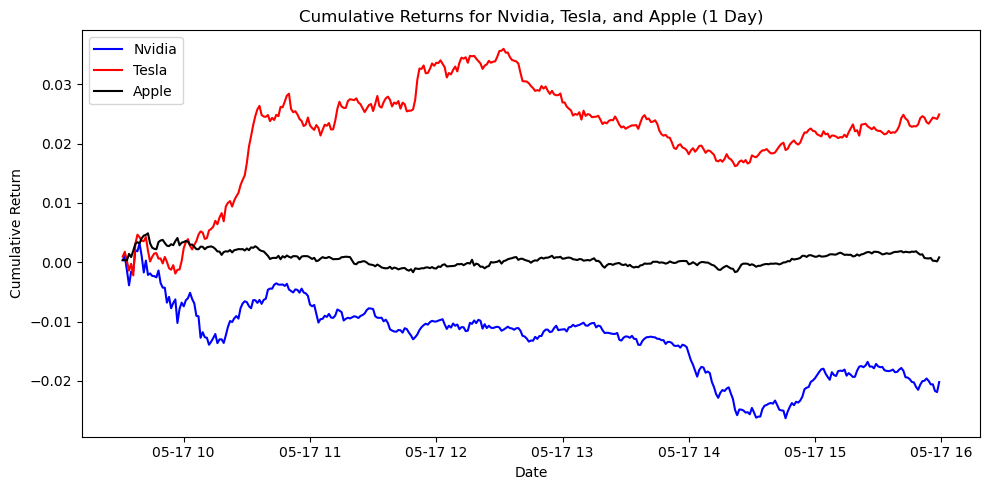

In [6]:
# Calculate cumulative returns for the 1 day
nvda_cumulative_return = (1 + nvda_df['Daily_Return']).cumprod() - 1
tsla_cumulative_return = (1 + tsla_df['Daily_Return']).cumprod() - 1
aapl_cumulative_return = (1 + aapl_df['Daily_Return']).cumprod() - 1

# Create the plot
plt.figure(figsize=(10, 5)) 

plt.plot(nvda_cumulative_return.index, nvda_cumulative_return, label='Nvidia', color='blue')
plt.plot(tsla_cumulative_return.index, tsla_cumulative_return, label='Tesla', color='red')
plt.plot(aapl_cumulative_return.index, aapl_cumulative_return, label='Apple', color='black')

# Add title and labels
plt.title('Cumulative Returns for Nvidia, Tesla, and Apple (1 Day)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend(loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

Cumulative returns represent the total percentage change in the stock’s value over a given period, considering the compounding effect of daily returns. Here, I compared the investment performance of Apple, Tesla and Nvidia during the specified period, showing which stock had higher or lower cumulative returns over that time frame.

* A Higher Cumulative Returns: Indicate significant appreciation and strong performance, making the stock attractive for growth-focused investors.
* Average Cumulative Returns: Suggest steady, consistent growth, appealing to investors seeking stability and moderate returns.
* A Lower or Negative Cumulative Returns: Indicate depreciation and poor performance, which could signal potential risks or, for some, buying opportunities if a recovery is anticipated.

We can see that Tesla had a high cumulative return while Apple had a moderate or average Nvidia had a negative cumulative returns through the day.

### Calculate Volatility of Nvidia, Tesla and Apple Stocks

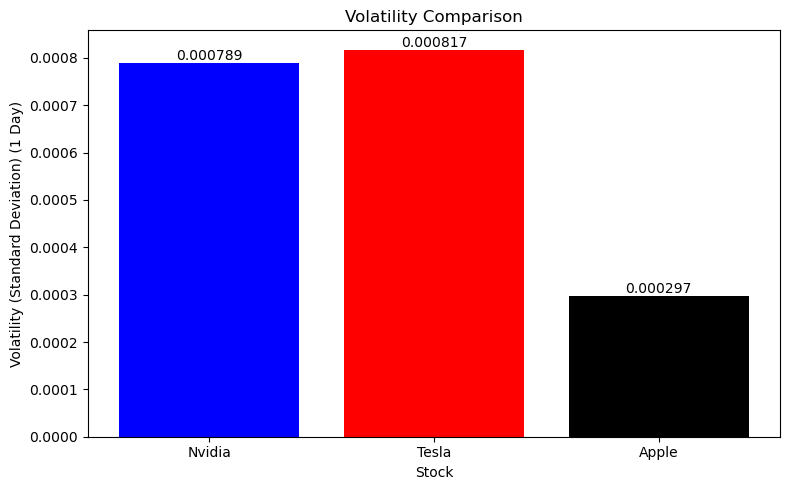

In [19]:
# Calculate historical volatility (standard deviation of daily returns)
nvda_volatility = nvda_df['Daily_Return'].std()
tsla_volatility = tsla_df['Daily_Return'].std()
aapl_volatility = aapl_df['Daily_Return'].std()

# Data for plotting
stocks = ['Nvidia', 'Tesla', 'Apple']
volatility = [nvda_volatility, tsla_volatility, aapl_volatility]
colors = ['blue', 'red', 'black']

# Create a bar plot to compare volatility
plt.figure(figsize=(8, 5))
bars = plt.bar(stocks, volatility, color=colors)

# Add text annotations to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.6f}', va='bottom', ha='center')

# Add title and labels
plt.title('Volatility Comparison')
plt.xlabel('Stock')
plt.ylabel('Volatility (Standard Deviation) (1 Day)')

# Show the plot
plt.tight_layout()
plt.show()

High volatility indicates that the stock or market experiences large and frequent price movements, while low volatility indicates that the market experiences smaller or less frequent price movements.

We can see that Tesla’s volatility is higher at 0.000817  than Nvidia's (0.000789) and Apple’s (0.000297).

Tesla: (Higher Volatility)
* Tesla’s stock is considered riskier compared to Nvidia and Apple. Investors generally associate higher volatility with higher risk because it implies that the stock price can change significantly in a short period, presenting bot higher potential returns and higher risk.
* Tesla’s stock may be more sensitive to market conditions, economic factors, or company-specific news and events. This heightened sensitivity can result in larger price swings.
* Traders and investors with a higher risk tolerance might find Tesla’s stock appealing for opportunities to profit from short-term price movements.The potential for high returns attracts those willing to accept the associated risk.

Nvidia: (Moderate Volatility) 
* Nvidia’s stock shows a balance between stability and variability. This level of volatility might result from a mix of steady performance and occasional significant market responses to industry trends or company news.
* Nvidia presents a balanced risk profile, offering potential for considerable returns without the extreme price swings seen in higher volatility stocks like Tesla.
* Investors with a moderate risk tolerance might find Nvidia appealing, as it offers growth potential with manageable risk levels.

Apple: Lower Volatility (0.000297)
* Apple’s stock price is more stable, experiencing less frequent and smaller fluctuations. This stability can be attributed to Apple's strong market position, consistent financial performance, and investor confidence.
* Lower volatility stocks like Apple are typically seen as safer investments. They might not offer the high returns seen in more volatile stocks, but they also present a lower risk of significant losses.
* Apple’s lower volatility makes it an attractive option for long-term investors looking for steady growth and reliable returns without worrying about substantial short-term price swings.